C:\Users\imada\AppData\Local\Temp\ipykernel_8628\4160599596.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_PCA.eigenvec"), delim_whitespace=True, header=None, names=pca_cols)


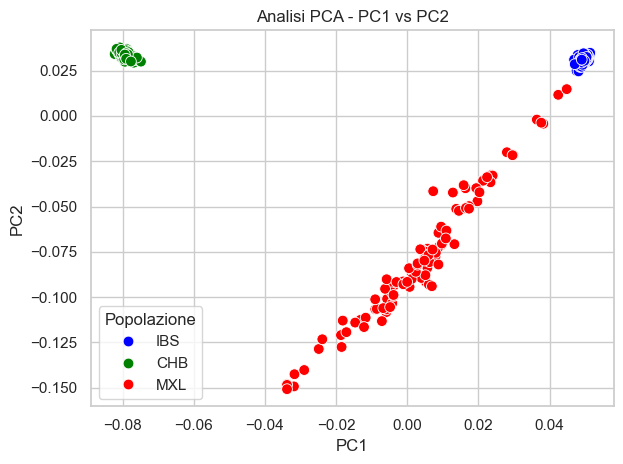

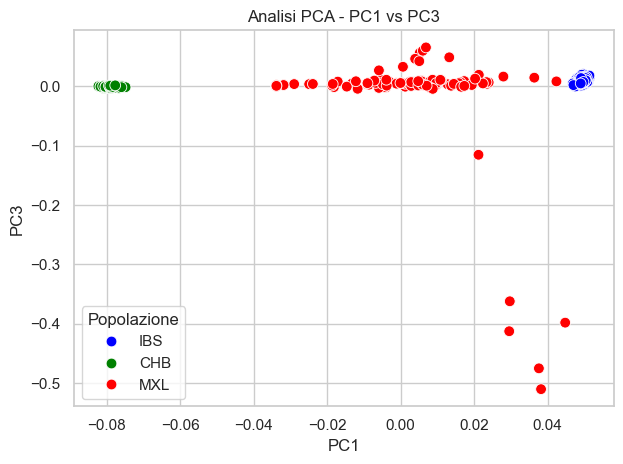

In [1]:
# 1. ANALISI PCA
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Librerie per grafici specifici
from matplotlib.patches import Patch

# Percorso dei dati
data_dir = "D:/plink_win64_20250615nuovo/"
colors = {"IBS": "blue", "MXL": "red", "CHB": "green"}

pca_cols = ["FID", "IID"] + [f"PC{i}" for i in range(1, 9)]
pca_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_PCA.eigenvec"), delim_whitespace=True, header=None, names=pca_cols)

sns.set(style="whitegrid")
fig1, ax1 = plt.subplots()
sns.scatterplot(data=pca_data, x="PC1", y="PC2", hue="FID", palette=colors, s=60, ax=ax1)
ax1.set_title("Analisi PCA - PC1 vs PC2")
plt.legend(title="Popolazione")
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots()
sns.scatterplot(data=pca_data, x="PC1", y="PC3", hue="FID", palette=colors, s=60, ax=ax2)
ax2.set_title("Analisi PCA - PC1 vs PC3")
plt.legend(title="Popolazione")
plt.tight_layout()
plt.show()

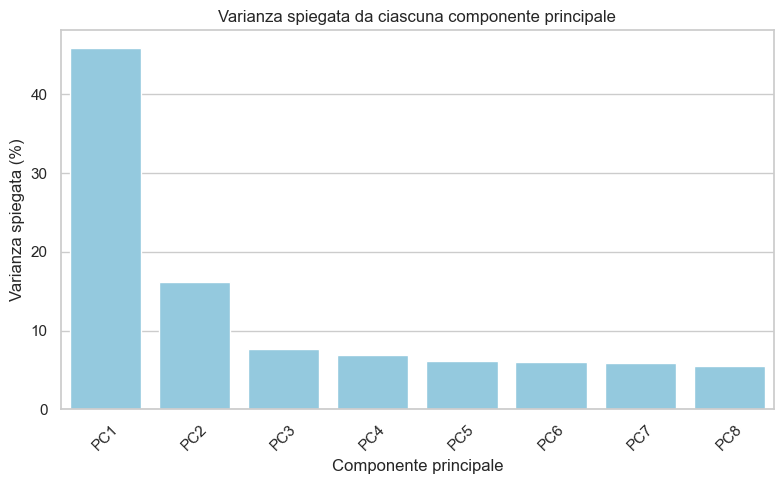

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Percorso del file eigenval
data_dir = "D:/plink_win64_20250615nuovo/"
eigenval_path = os.path.join(data_dir, "IBS_MXL_CHB_PCA.eigenval")

# Carica gli eigenvalues
# Carica gli eigenvalues come dataframe, poi "schiaccia" in una Series
eigenvalues = pd.read_csv(eigenval_path, header=None).squeeze()


# Calcola la varianza spiegata (in percentuale)
explained_var = eigenvalues / eigenvalues.sum() * 100

# Crea lo scree plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))],
            y=explained_var,
            color="skyblue")

plt.title("Varianza spiegata da ciascuna componente principale")
plt.xlabel("Componente principale")
plt.ylabel("Varianza spiegata (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\imada\AppData\Local\Temp\ipykernel_8628\3598266319.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  inbreeding_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_inbreeding.het"), delim_whitespace=True)
C:\Users\imada\AppData\Local\Temp\ipykernel_8628\3598266319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inbreeding_data, x="FID", y="F", palette=colors, ax=ax3)


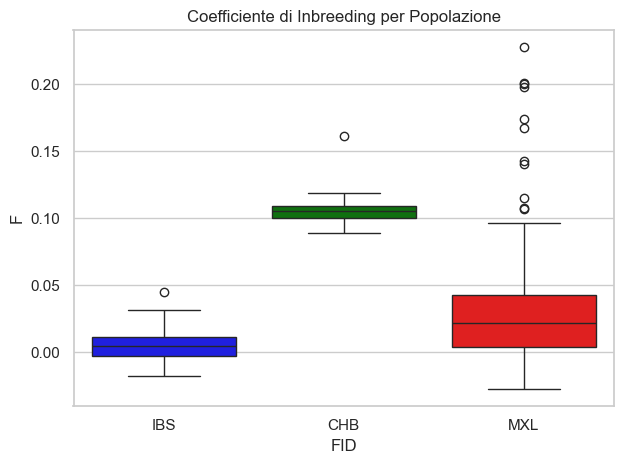

In [2]:
# 2. INBREEDING
# ==========================
inbreeding_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_inbreeding.het"), delim_whitespace=True)
stats_inbreeding = inbreeding_data.groupby("FID")["F"].agg(["mean", "std", "min", "max"]).reset_index()

fig3, ax3 = plt.subplots()
sns.boxplot(data=inbreeding_data, x="FID", y="F", palette=colors, ax=ax3)
ax3.set_title("Coefficiente di Inbreeding per Popolazione")
plt.tight_layout()
plt.show()

Mediana F_MISS: 0.010320
Deviazione standard F_MISS: 0.018610


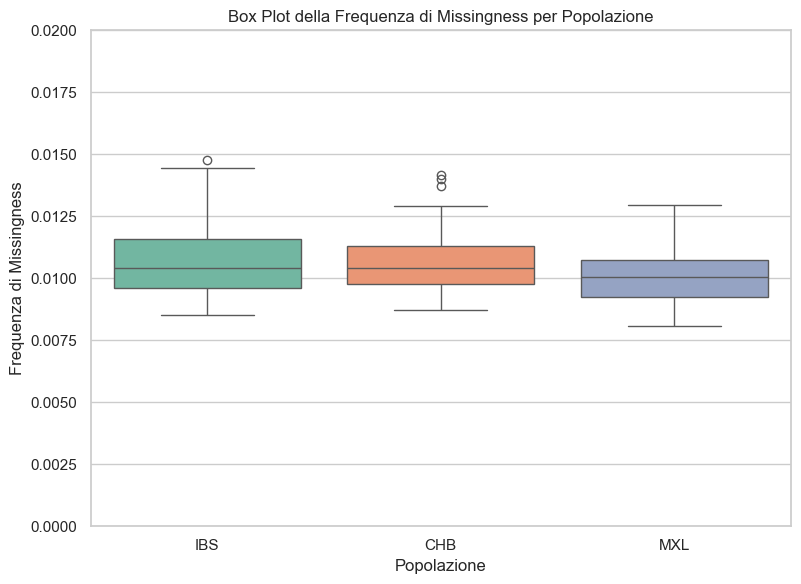

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica il file .imis
imis = pd.read_csv(r"D:\plink_win64_20250615nuovo\IBS_MXL_CHB_missing.imiss", sep=r"\s+")

# Calcola statistiche descrittive
median_fmiss = imis['F_MISS'].median()
std_fmiss = imis['F_MISS'].std()

print(f"Mediana F_MISS: {median_fmiss:.6f}")
print(f"Deviazione standard F_MISS: {std_fmiss:.6f}")

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=imis, x='FID', y='F_MISS', hue='FID', palette="Set2", legend=False)
plt.title("Box Plot della Frequenza di Missingness per Popolazione")
plt.xlabel("Popolazione")
plt.ylabel("Frequenza di Missingness")
plt.tight_layout()
plt.ylim(0, 0.02)  # o un range che mostri meglio la parte densa

plt.show()



In [24]:
# 3. FST & MANHATTAN PLOT
# ==========================
freq_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_freq.frq.strat"), delim_whitespace=True)
IBS_freq = freq_data[freq_data["CLST"] == "IBS"].reset_index(drop=True)
MXL_freq = freq_data[freq_data["CLST"] == "MXL"].reset_index(drop=True)
CHB_freq = freq_data[freq_data["CLST"] == "CHB"].reset_index(drop=True)

def calcola_fst(freq1, freq2):
    fst = []
    for a, b in zip(freq1["MAF"], freq2["MAF"]):
        if 0 < a < 1 and 0 < b < 1:
            p_m = (a + b) / 2
            ht = 2 * p_m * (1 - p_m)
            hs = (2 * a * (1 - a) + 2 * b * (1 - b)) / 2
            fst_val = max((ht - hs) / ht, 0)
            fst.append(fst_val)
        else:
            fst.append(np.nan)
    return np.array(fst)

fst_IBS_MXL = calcola_fst(IBS_freq, MXL_freq)
fst_IBS_CHB = calcola_fst(IBS_freq, CHB_freq)
fst_MXL_CHB = calcola_fst(MXL_freq, CHB_freq)

fst_medi = {
    "IBS vs MXL": np.nanmean(fst_IBS_MXL),
    "IBS vs CHB": np.nanmean(fst_IBS_CHB),
    "MXL vs CHB": np.nanmean(fst_MXL_CHB)
}

# Posizioni SNP
estratte = IBS_freq["SNP"].str.extract(r"_(\d+)")
posizioni = pd.to_numeric(estratte[0], errors="coerce")
posizioni = posizioni.fillna(pd.Series(range(len(IBS_freq)))).astype(float)




C:\Users\imada\AppData\Local\Temp\ipykernel_8628\3956656198.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  freq_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_freq.frq.strat"), delim_whitespace=True)


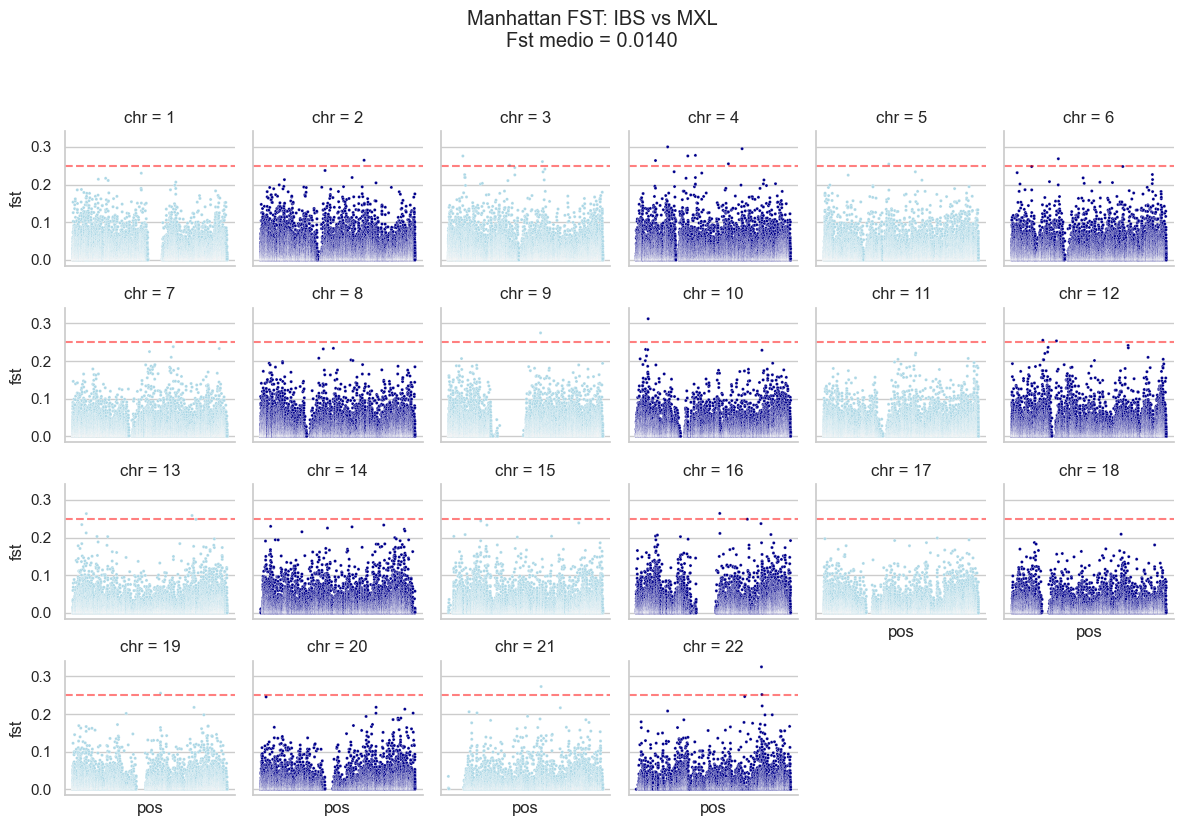

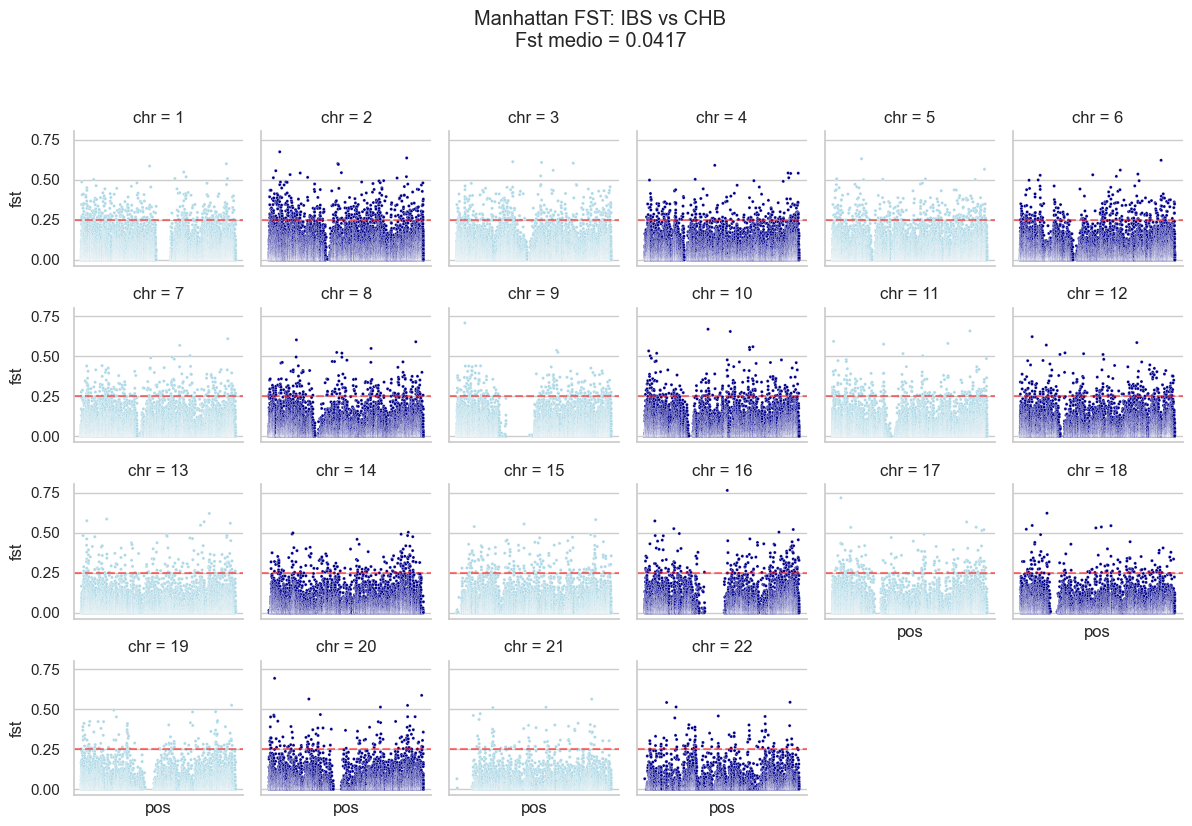

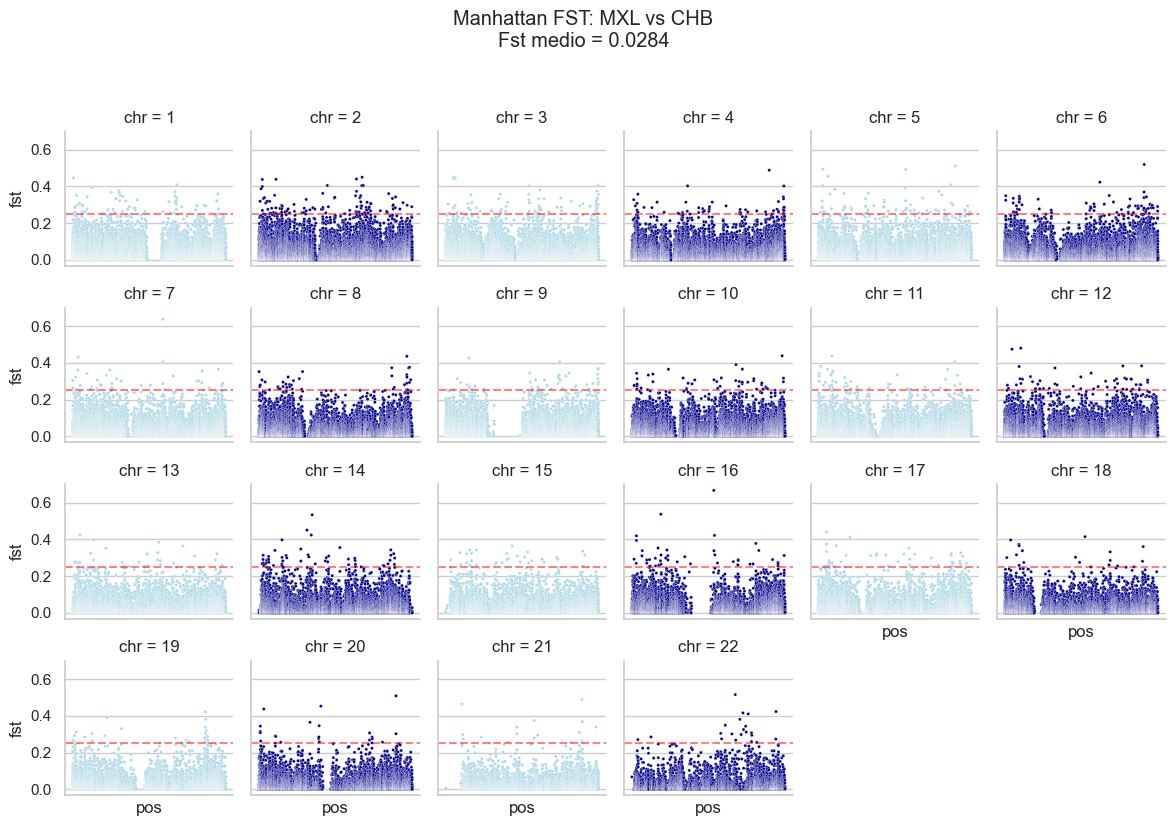

In [6]:
# Dataset Manhattan
def crea_manhattan_data(fst, freq, confronto):
    return pd.DataFrame({
        "chr": freq["CHR"],
        "pos": posizioni,
        "fst": fst,
        "confronto": confronto
    }).dropna()

manh_IBS_MXL = crea_manhattan_data(fst_IBS_MXL, IBS_freq, "IBS vs MXL")
manh_IBS_CHB = crea_manhattan_data(fst_IBS_CHB, IBS_freq, "IBS vs CHB")
manh_MXL_CHB = crea_manhattan_data(fst_MXL_CHB, MXL_freq, "MXL vs CHB")

# Funzione Manhattan
colori_chr = ["darkblue", "lightblue"]
def plot_manhattan(df, titolo, fst_medio):
    g = sns.FacetGrid(df, col="chr", col_wrap=6, sharex=False, height=2)
    g.map_dataframe(sns.scatterplot, x="pos", y="fst", hue=df["chr"] % 2, palette=colori_chr, legend=False, s=5)
    g.fig.suptitle(titolo + f"\nFst medio = {fst_medio:.4f}", y=1.03)
    for ax in g.axes:
        ax.axhline(0.25, linestyle="--", color="red", alpha=0.5)
        ax.set_xticks([])
    plt.tight_layout()
    plt.show()

plot_manhattan(manh_IBS_MXL, "Manhattan FST: IBS vs MXL", fst_medi["IBS vs MXL"])
plot_manhattan(manh_IBS_CHB, "Manhattan FST: IBS vs CHB", fst_medi["IBS vs CHB"])
plot_manhattan(manh_MXL_CHB, "Manhattan FST: MXL vs CHB", fst_medi["MXL vs CHB"])


In [7]:
# 4. TOP 5 SNP
# ==========================
def estrai_top_snp(manh_data, freq_ref, n=5):
    top = manh_data.sort_values(by="fst", ascending=False).head(n)
    top = top.copy()
    top["SNP"] = freq_ref["SNP"].values[top.index]
    top["MAF_ref"] = freq_ref["MAF"].values[top.index]
    return top[["chr", "SNP", "fst", "MAF_ref"]]

top_IBS_MXL = estrai_top_snp(manh_IBS_MXL, IBS_freq)
top_IBS_CHB = estrai_top_snp(manh_IBS_CHB, IBS_freq)
top_MXL_CHB = estrai_top_snp(manh_MXL_CHB, MXL_freq)

print("\n=== TOP 5 SNP FST ===")
print("\nIBS vs MXL:\n", top_IBS_MXL)
print("\nIBS vs CHB:\n", top_IBS_CHB)
print("\nMXL vs CHB:\n", top_MXL_CHB)



=== TOP 5 SNP FST ===

IBS vs MXL:
         chr          SNP       fst   MAF_ref
560817   22  22_44661444  0.325262  0.070470
323939   10  10_10584216  0.312409  0.020130
137716    4   4_38907988  0.300191  0.060810
151858    4  4_130949094  0.295418  0.006803
142865    4   4_73255620  0.277666  0.127500

IBS vs CHB:
         chr          SNP       fst  MAF_ref
470031   16  16_48258198  0.763924  0.09732
483490   17   17_4400392  0.717615  0.15770
296828    9    9_7385490  0.707789  0.84230
532479   20   20_2315543  0.692560  0.03020
49371     2   2_16795567  0.674339  0.09732

MXL vs CHB:
         chr          SNP       fst  MAF_ref
470031   16  16_48258198  0.666285    0.160
252633    7   7_93693901  0.636799    0.090
467041   16  16_17057339  0.536492    0.140
431550   14  14_49806704  0.533383    0.175
229881    6  6_155741637  0.519249    0.095


C:\Users\imada\AppData\Local\Temp\ipykernel_8628\1684238018.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  roh_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_RoH.hom.indiv"), delim_whitespace=True)
C:\Users\imada\AppData\Local\Temp\ipykernel_8628\1684238018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=roh_data, x="FID", y="KB", palette=colors, ax=ax4)


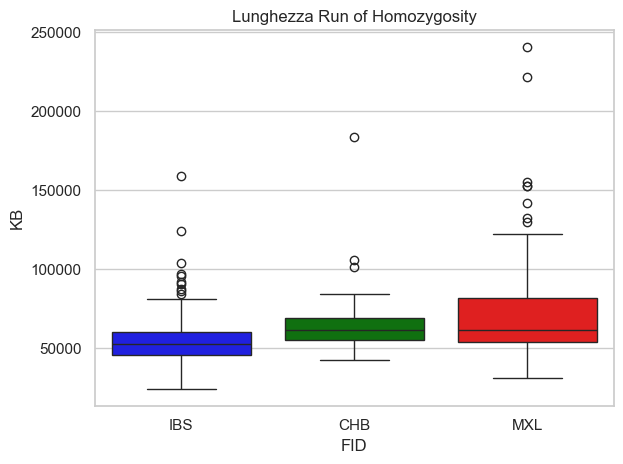

In [8]:
# 5. RUN OF HOMOZYGOSITY
# ==========================
METTERE GRAFICO ROH
roh_data = pd.read_csv(os.path.join(data_dir, "IBS_MXL_CHB_RoH.hom.indiv"), delim_whitespace=True)
stats_roh = roh_data.groupby("FID").agg(media_KB=("KB", "mean"), media_segmenti=("NSEG", "mean"), deviazione_KB=("KB", "std")).reset_index()

fig4, ax4 = plt.subplots()
sns.boxplot(data=roh_data, x="FID", y="KB", palette=colors, ax=ax4)
ax4.set_title("Lunghezza Run of Homozygosity")
plt.tight_layout()
plt.show()

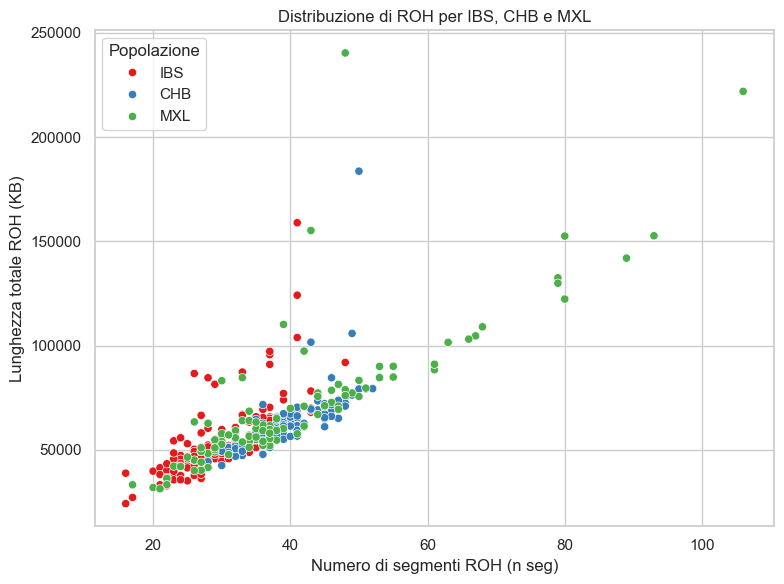

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: n_seg (asse x) vs lunghezza in KB (asse y), colorati per popolazione
plt.figure(figsize=(8, 6))
sns.scatterplot(data=roh_data, x="NSEG", y="KB", hue="FID", palette="Set1")

plt.title("Distribuzione di ROH per IBS, CHB e MXL")
plt.xlabel("Numero di segmenti ROH (n seg)")
plt.ylabel("Lunghezza totale ROH (KB)")
plt.legend(title="Popolazione")
plt.tight_layout()
plt.show()


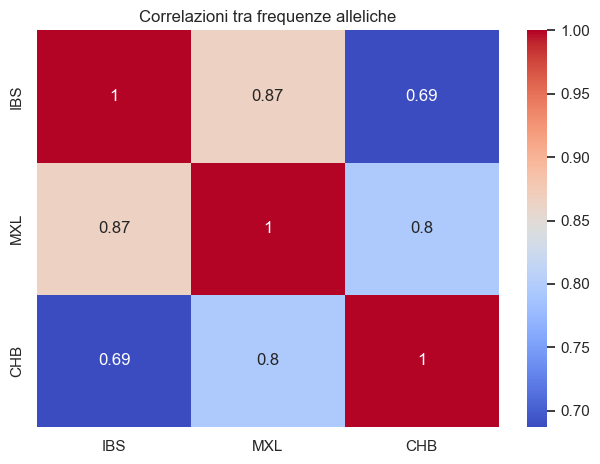

In [9]:
# 6. CORRELAZIONI
# ==========================
maf_data = pd.DataFrame({
    "IBS": IBS_freq["MAF"].values,
    "MXL": MXL_freq["MAF"].values,
    "CHB": CHB_freq["MAF"].values
})
cor_matrix = maf_data.corr()

fig_corr, ax_corr = plt.subplots()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", ax=ax_corr)
ax_corr.set_title("Correlazioni tra frequenze alleliche")
plt.tight_layout()
plt.show()


C:\Users\imada\AppData\Local\Temp\ipykernel_8628\2320397797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fst_df, x="Confronto", y="Fst", ax=ax_fst, palette="Set2")


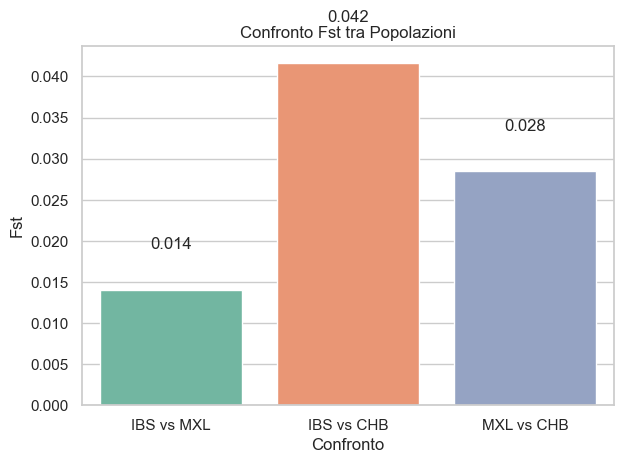

In [10]:
# 7. FST COMPARISON
# ==========================
fst_df = pd.DataFrame({
    "Confronto": list(fst_medi.keys()),
    "Fst": list(fst_medi.values())
})

fig_fst, ax_fst = plt.subplots()
sns.barplot(data=fst_df, x="Confronto", y="Fst", ax=ax_fst, palette="Set2")
for index, row in fst_df.iterrows():
    ax_fst.text(index, row.Fst + 0.005, f"{row.Fst:.3f}", ha='center')
ax_fst.set_title("Confronto Fst tra Popolazioni")
plt.tight_layout()
plt.show()

In [11]:
print("\n=== RIASSUNTO FINALE ===")
print("Popolazioni analizzate:")
print("- IBS: Iberi (Spagna) - Europa")
print("- MXL: Messicani (Los Angeles) - America")
print("- CHB: Cinesi Han (Pechino) - Asia")
print("\nNumero SNP analizzati:", len(IBS_freq))

print("\nFST medi:")
for k, v in fst_medi.items():
    print(f"- {k}: {v:.4f}")

print("\nInterpretazione:")
if fst_medi["IBS vs CHB"] > fst_medi["IBS vs MXL"]:
    print("- IBS è più simile a MXL che a CHB (probabili migrazioni storiche)")

print("\nInbreeding medio:")
for _, row in stats_inbreeding.iterrows():
    print(f"- {row['FID']}: {row['mean']:.4f}")



=== RIASSUNTO FINALE ===
Popolazioni analizzate:
- IBS: Iberi (Spagna) - Europa
- MXL: Messicani (Los Angeles) - America
- CHB: Cinesi Han (Pechino) - Asia

Numero SNP analizzati: 563315

FST medi:
- IBS vs MXL: 0.0140
- IBS vs CHB: 0.0417
- MXL vs CHB: 0.0284

Interpretazione:
- IBS è più simile a MXL che a CHB (probabili migrazioni storiche)

Inbreeding medio:
- CHB: 0.1055
- IBS: 0.0049
- MXL: 0.0360
